<a href="https://colab.research.google.com/github/aRUsh-codes/Titanic_SANK/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [247]:
from IPython.display import Image
Image(url= "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTl2xLFkOlNyhQAGX53IKnLHR1cllEIIo4qE6qR5YtVFg&s")

In [178]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [179]:
#READING THE FILE
train = pd.read_csv("/content/train.csv")

#CHECKING IF EVERY PASSENGER HAS PASSENGER_ID
print(np.unique(train['PassengerId'].values).size)
print(train.shape[0])

891
891


In [180]:
#MAKING THE 'PASSENGER_ID' AS AN INDEX
train.set_index(['PassengerId'], inplace=True)
print(train.head(3))

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  


In [181]:
#USING re(REGULAR EXPRESSION) TO CREATE AND MERGE DIFFERENT TITLES
pattern=re.compile('\s(\S+\.)')
titles=np.array([re.search(pattern,i)[1] for i in train['Name'].values])
print(np.unique(titles))

['Capt.' 'Col.' 'Countess.' 'Don.' 'Dr.' 'Jonkheer.' 'Lady.' 'Major.'
 'Master.' 'Miss.' 'Mlle.' 'Mme.' 'Mr.' 'Mrs.' 'Ms.' 'Rev.' 'Sir.']


In [182]:
#ASSIGNING 'TITLE' AS NEW COLUMN AND THEN DROPPING THE PREVIOUS COLUMN 'NAME'
train=train.assign(Title=titles)
train=train.drop('Name',axis=1)


print(train['Title'].groupby(train['Title']).size())


#ASSIGNING NEW TITLES BY REPLACING THE OLD ONES
train['Title']=train['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
train['Title']=train['Title'].replace(['Capt.', 'Col.', 'Major.'], 'Army.')
train['Title']=train['Title'].replace('Mme.', 'Mrs.')
train['Title']=train['Title'].replace(['Countess.', 'Don.', 'Jonkheer.', 'Lady.', 'Sir.'], 'Noble.')


Title
Capt.          1
Col.           2
Countess.      1
Don.           1
Dr.            7
Jonkheer.      1
Lady.          1
Major.         2
Master.       40
Miss.        182
Mlle.          2
Mme.           1
Mr.          517
Mrs.         125
Ms.            1
Rev.           6
Sir.           1
Name: Title, dtype: int64


In [183]:
train.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
      dtype='int64', name='PassengerId', length=891)

In [184]:
train.axes

[Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        ...
        882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
       dtype='int64', name='PassengerId', length=891),
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked', 'Title'],
       dtype='object')]

In [185]:
train.loc[:,['Title','Sex','Ticket']]

,Title,Sex,Ticket
PassengerId,,,
1,Mr.,male,A/5 21171
2,Mrs.,female,PC 17599
3,Miss.,female,STON/O2. 3101282
4,Mrs.,female,113803
5,Mr.,male,373450
...,...,...,...
887,Rev.,male,211536
888,Miss.,female,112053
889,Miss.,female,W./C. 6607


In [186]:
train[['Title','Sex']]

,Title,Sex
PassengerId,,
1,Mr.,male
2,Mrs.,female
3,Miss.,female
4,Mrs.,female
5,Mr.,male
...,...,...
887,Rev.,male
888,Miss.,female
889,Miss.,female


In [187]:
#FUNCTION FOR ASSIGNING CATEGORY TO NONE IS NOT PRESENT
def cabinCat(x):
    if pd.isnull(x):
        cat='None'
    else:
        cat=x[0]
    return cat


#ASSIGNING CATEGORY TO NONE IF NOT PRESENT AND ADDING IT AS NEW COLUMN AND DROPPING PREVIOUS VERISON OUT
cabincategory=np.array([cabinCat(c) for c in train['Cabin'].values])
train=train.assign(category=cabincategory)
train=train.drop('Cabin',axis=1)
#print(train.head(5))
print("Number of people in different categories: \n {}".format(train['category'].groupby(train['category']).size()))



Number of people in different categories: 
 category
A        15
B        47
C        59
D        33
E        32
F        13
G         4
None    687
T         1
Name: category, dtype: int64


# **Exploratory Data Analysis**

In [188]:
survived=train.loc[train['Survived']==1,:]
died=train.loc[train['Survived']==0,:]


survived_male=survived.loc[survived['Sex']=='male',:]
survived_female=survived.loc[survived['Sex']=='female',:]
died_male=died.loc[died['Sex']=='male',:]
died_female=died.loc[died['Sex']=='female',:]


survived_male_n=survived_male.shape[0]
survived_female_n=survived_female.shape[0]
died_male_n=died_male.shape[0]
died_female_n=died_female.shape[0]

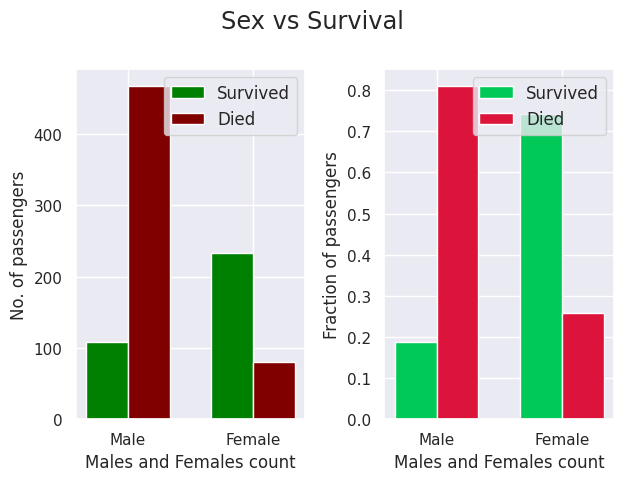

In [189]:
fig,axes=plt.subplots(nrows=1,ncols=2)
plt.axes(axes[0])
survied=plt.bar([0.5,3.5],[survived_male_n,survived_female_n],width=1,color='green')
died=plt.bar([1.5,4.5],[died_male_n,died_female_n],width=1,color='maroon')
plt.xticks([1,4],('Male','Female'))
plt.ylabel('No. of passengers')
plt.xlabel('Males and Females count')
plt.legend((survied,died),('Survived','Died'),loc=0,fontsize='medium')
plt.axes(axes[1])
survived_frac=plt.bar([0.5,3.5],[survived_male_n/(survived_male_n+died_male_n),survived_female_n/(survived_female_n+died_female_n)],width=1,color='#00C957')
died_frac=plt.bar([1.5,4.5],[((died_male_n)/(survived_male_n+died_male_n)),((died_female_n)/(survived_female_n+died_female_n))],width=1,color='#DC143C')
plt.xticks([1,4],('Male','Female'))
plt.ylabel('Fraction of passengers')
plt.xlabel('Males and Females count')
plt.legend((survived_frac,died_frac),('Survived','Died'),loc=0,fontsize='medium')
fig.suptitle('Sex vs Survival', fontsize='x-large', y=1)
plt.tight_layout()
plt.show()

In [190]:
sns.set()

In [191]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Survived: Sex
female    233
male      109
Name: count, dtype: int64
Dead: Sex
male      468
female     81
Name: count, dtype: int64


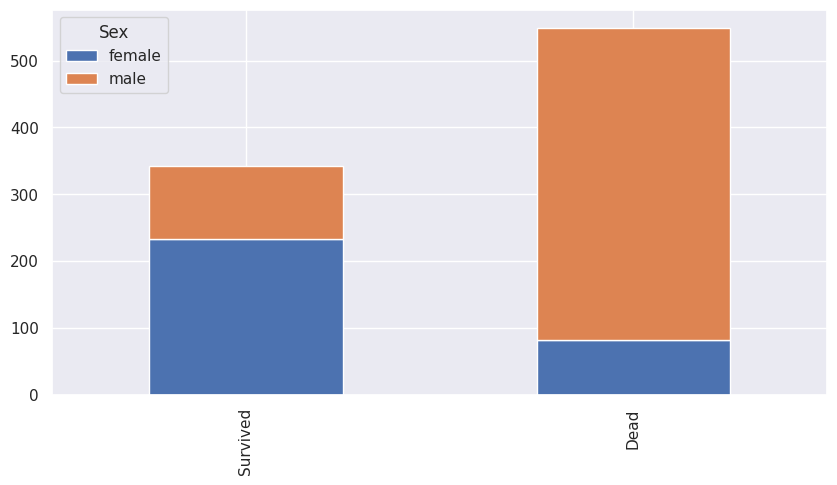

In [192]:
bar_chart('Sex')
print("Survived:",train[train["Survived"]==1]["Sex"].value_counts())
print("Dead:",train[train["Survived"]==0]["Sex"].value_counts())

In [193]:
#sex age sibsp parch embarked cabin title

Survived: Embarked
S    217
C     93
Q     30
Name: count, dtype: int64
Survived: Embarked
S    427
C     75
Q     47
Name: count, dtype: int64


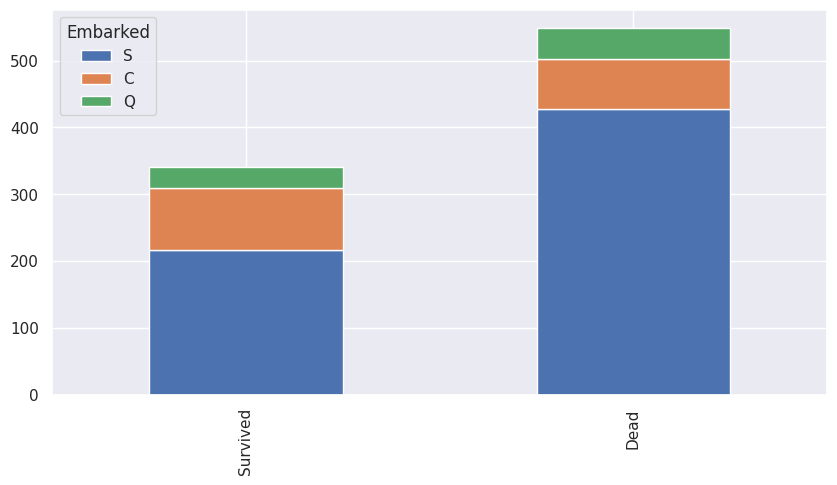

In [194]:
bar_chart("Embarked")
print("Survived:",train[train["Survived"]==1]["Embarked"].value_counts())
print("Survived:",train[train["Survived"]==0]["Embarked"].value_counts())

Survived: Title
Miss.      130
Mrs.       100
Mr.         81
Master.     23
Noble.       3
Dr.          3
Army.        2
Name: count, dtype: int64
Survived: Title
Mr.        436
Miss.       55
Mrs.        26
Master.     17
Rev.         6
Dr.          4
Army.        3
Noble.       2
Name: count, dtype: int64


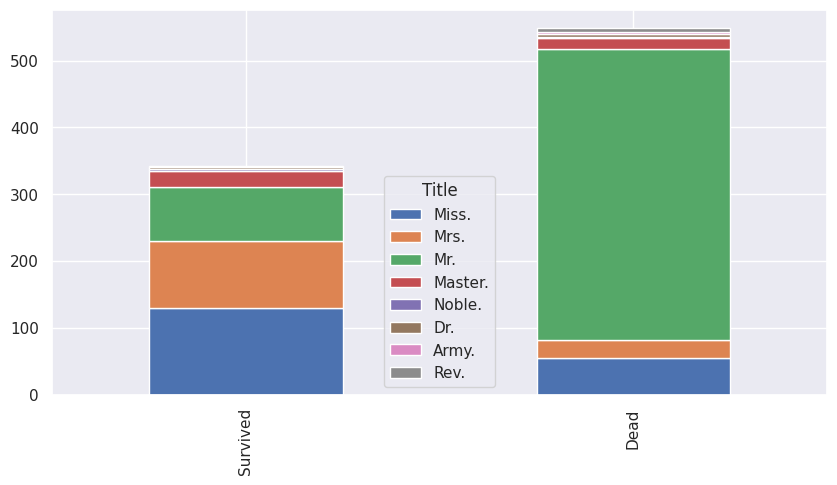

In [195]:
bar_chart("Title")
print("Survived:",train[train["Survived"]==1]["Title"].value_counts())
print("Survived:",train[train["Survived"]==0]["Title"].value_counts())

Survived: Pclass
1    136
3    119
2     87
Name: count, dtype: int64
Survived: Pclass
3    372
2     97
1     80
Name: count, dtype: int64


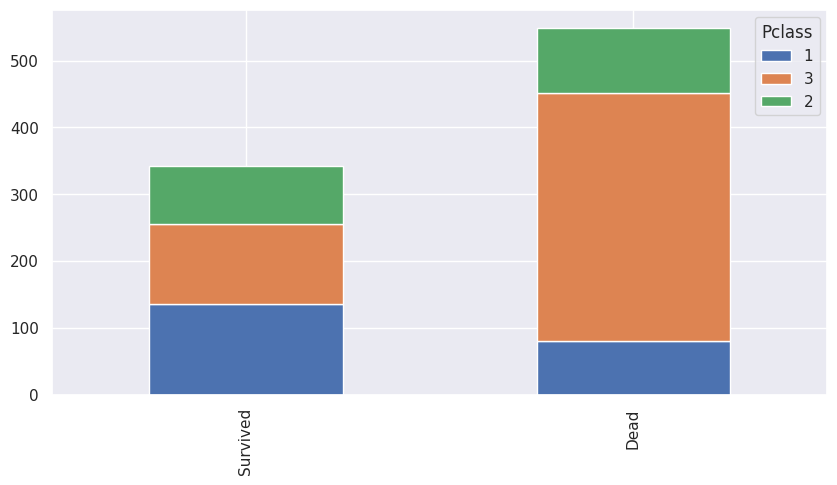

In [196]:
bar_chart("Pclass")
print("Survived:",train[train["Survived"]==1]["Pclass"].value_counts())
print("Survived:",train[train["Survived"]==0]["Pclass"].value_counts())

Survived: SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64
Survived: SibSp
0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: count, dtype: int64


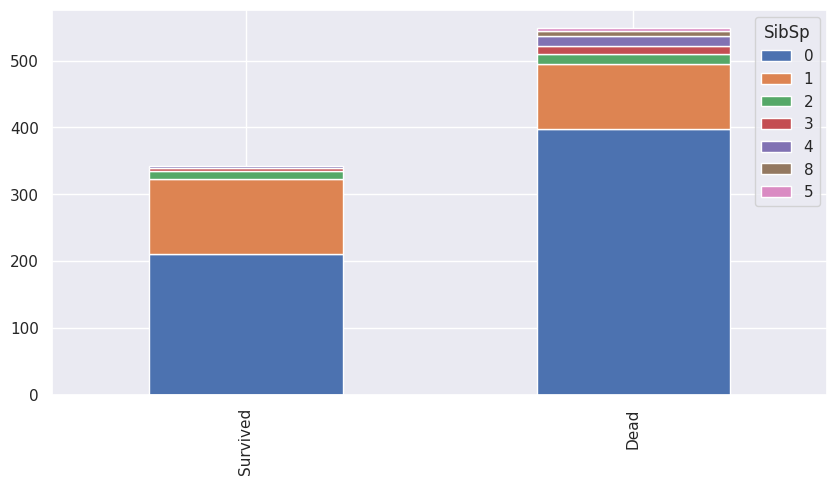

In [197]:
bar_chart("SibSp")
print("Survived:",train[train["Survived"]==1]["SibSp"].value_counts())
print("Survived:",train[train["Survived"]==0]["SibSp"].value_counts())

Survived: Parch
0    233
1     65
2     40
3      3
5      1
Name: count, dtype: int64
Survived: Parch
0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: count, dtype: int64


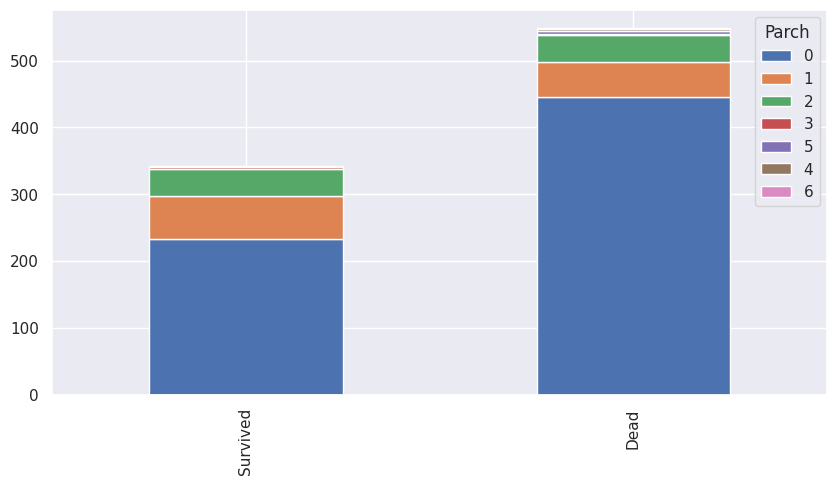

In [198]:
bar_chart("Parch")
print("Survived:",train[train["Survived"]==1]["Parch"].value_counts())
print("Survived:",train[train["Survived"]==0]["Parch"].value_counts())

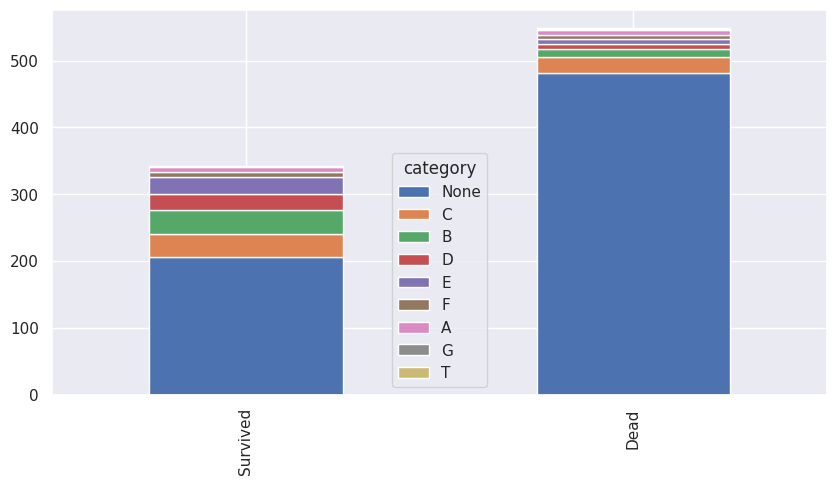

In [199]:
bar_chart("category")

In [200]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,category
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr.,None
2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs.,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,None
4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs.,C
5,0,3,male,35.0,0,0,373450,8.0500,S,Mr.,None


In [201]:
bins=np.array(np.arange(0,251,10),train['Fare'].max())
train_bin_fared=pd.cut(train['Fare'],bins,include_lowest=True)
train[['Survived']].groupby(train_bin_fared).mean()
print("Number of passengers:\n{}".format(train['Fare'].groupby(train_bin_fared).count()))
print("\n")
print("Average survival:\n{}".format(train['Survived'].groupby(train_bin_fared).mean()))

Number of passengers:
Fare
(-0.001, 10.0]    336
(10.0, 20.0]      179
(20.0, 30.0]      142
(30.0, 40.0]       58
(40.0, 50.0]       16
(50.0, 60.0]       38
(60.0, 70.0]       17
(70.0, 80.0]       31
(80.0, 90.0]       17
(90.0, 100.0]       4
(100.0, 110.0]      4
(110.0, 120.0]     11
(120.0, 130.0]      0
(130.0, 140.0]      7
(140.0, 150.0]      2
(150.0, 160.0]      7
(160.0, 170.0]      2
(170.0, 180.0]      0
(180.0, 190.0]      0
(190.0, 200.0]      0
(200.0, 210.0]      0
(210.0, 220.0]      4
(220.0, 230.0]      5
(230.0, 240.0]      0
(240.0, 250.0]      2
Name: Fare, dtype: int64


Average survival:
Fare
(-0.001, 10.0]    0.199405
(10.0, 20.0]      0.424581
(20.0, 30.0]      0.443662
(30.0, 40.0]      0.396552
(40.0, 50.0]      0.250000
(50.0, 60.0]      0.710526
(60.0, 70.0]      0.352941
(70.0, 80.0]      0.612903
(80.0, 90.0]      0.823529
(90.0, 100.0]     1.000000
(100.0, 110.0]    0.500000
(110.0, 120.0]    0.818182
(120.0, 130.0]         NaN
(130.0, 140.0]    0.85

In [202]:
test=pd.read_csv("/content/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [203]:
train['Title'].value_counts()

Title
Mr.        517
Miss.      185
Mrs.       126
Master.     40
Dr.          7
Rev.         6
Noble.       5
Army.        5
Name: count, dtype: int64

In [204]:
test['Title']=test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [205]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [206]:
test.drop('Name', axis=1, inplace=True)

In [207]:
from sklearn.preprocessing import LabelEncoder
combined_data=[train,test]
for item in combined_data:
  le = LabelEncoder()
  label = le.fit_transform(item['Title'])
  label
  item.drop("Title", axis=1, inplace=True)
  item["Title"] = label
item['Title'].value_counts()

Title
5    240
4     78
6     72
3     21
0      2
8      2
7      1
2      1
1      1
Name: count, dtype: int64

In [208]:
for dataset in combined_data:
  le = LabelEncoder()
  label = le.fit_transform(item['Sex'])
  label
  item.drop("Sex", axis=1, inplace=True)
  item["Sex"] = label
item['Sex'].value_counts()

Sex
1    266
0    152
Name: count, dtype: int64

In [209]:
for dataset in train:
  le = LabelEncoder()
  label = le.fit_transform(item['Sex'])
  label
  item.drop("Sex", axis=1, inplace=True)
  item["Sex"] = label
item['Sex'].value_counts()

Sex
1    266
0    152
Name: count, dtype: int64

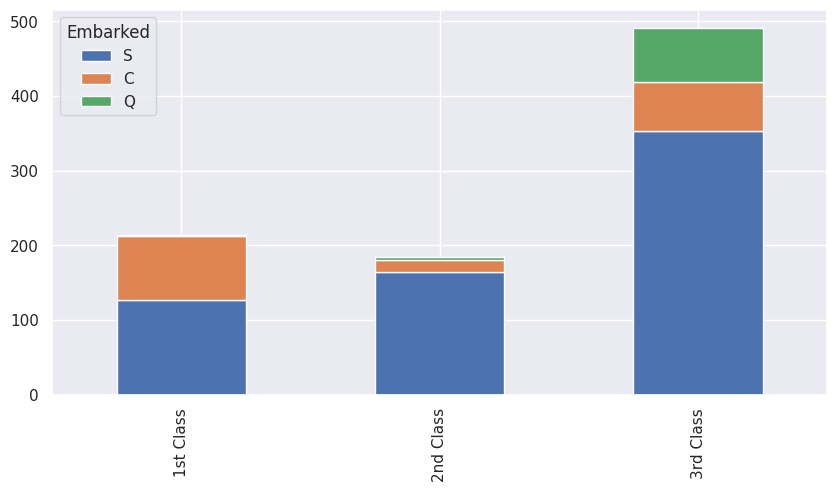

Pclass1:
 Embarked
S    127
C     85
Q      2
Name: count, dtype: int64
Pclass2:
 Embarked
S    164
C     17
Q      3
Name: count, dtype: int64
Pclass3:
 Embarked
S    353
Q     72
C     66
Name: count, dtype: int64


In [210]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

In [211]:
for dataset in combined_data:
    dataset['Embarked'] =  dataset['Embarked'].fillna('S')

In [212]:
for item in combined_data:
  le = LabelEncoder()
  label = le.fit_transform(item['Embarked'])
  label
  item.drop("Embarked", axis=1, inplace=True)
  item["Embarked"] = label
item['Embarked'].value_counts()

Embarked
2    270
0    102
1     46
Name: count, dtype: int64

In [213]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,category,Title,Embarked
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,None,4,2
2,1,1,female,38.0,1,0,PC 17599,71.2833,C,5,0
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,None,3,2
4,1,1,female,35.0,1,0,113803,53.1000,C,5,2
5,0,3,male,35.0,0,0,373450,8.0500,None,4,2
6,0,3,male,NaN,0,0,330877,8.4583,None,4,1
7,0,1,male,54.0,0,0,17463,51.8625,E,4,2
8,0,3,male,2.0,3,1,349909,21.0750,None,2,2
9,1,3,female,27.0,0,2,347742,11.1333,None,5,2


In [214]:
train["Age"].fillna(train.groupby("Pclass")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Pclass")["Age"].transform("median"), inplace=True)
train.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,category,Title,Embarked
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,None,4,2
2,1,1,female,38.0,1,0,PC 17599,71.2833,C,5,0
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,None,3,2
4,1,1,female,35.0,1,0,113803,53.1000,C,5,2
5,0,3,male,35.0,0,0,373450,8.0500,None,4,2
6,0,3,male,24.0,0,0,330877,8.4583,None,4,1
7,0,1,male,54.0,0,0,17463,51.8625,E,4,2
8,0,3,male,2.0,3,1,349909,21.0750,None,2,2
9,1,3,female,27.0,0,2,347742,11.1333,None,5,2


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


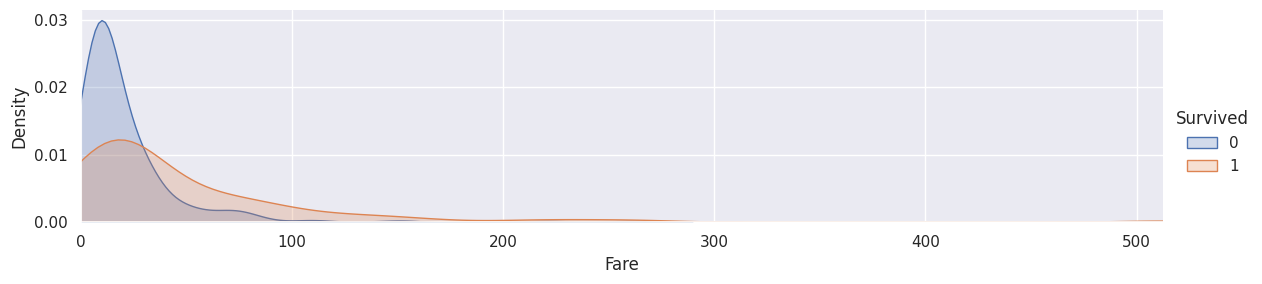

In [215]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4 )
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

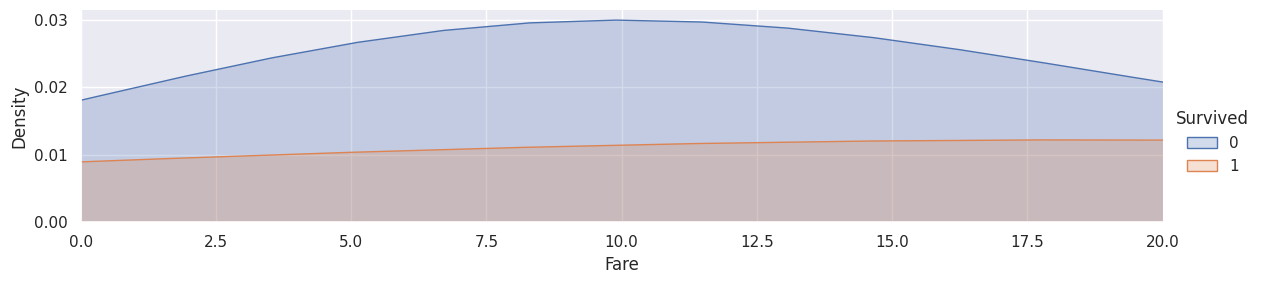

In [216]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [217]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [218]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [226]:
le = LabelEncoder()
label = le.fit_transform(train['Sex'])
label
train.drop("Sex", axis=1, inplace=True)
train["Sex"] = label
train['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [227]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,category,Title,Embarked,Sex
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,A/5 21171,7.2500,None,4,2,1
2,1,1,38.0,1,0,PC 17599,71.2833,C,5,0,0
3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,None,3,2,0
4,1,1,35.0,1,0,113803,53.1000,C,5,2,0
5,0,3,35.0,0,0,373450,8.0500,None,4,2,1


In [235]:
train.drop(["category"],axis=1,inplace=True)

In [236]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']
train_data.shape, target.shape
for dataset in train_data:
  le = LabelEncoder()
  label = le.fit_transform(item['Sex'])
  label
  item.drop("Sex", axis=1, inplace=True)
  item["Sex"] = label
print(item['Sex'].value_counts())
print(train_data.head())

Sex
1    266
0    152
Name: count, dtype: int64
             Pclass   Age  SibSp  Parch     Fare  Title  Embarked  Sex
PassengerId                                                           
1                 3  22.0      1      0   7.2500      4         2    1
2                 1  38.0      1      0  71.2833      5         0    0
3                 3  26.0      0      0   7.9250      3         2    0
4                 1  35.0      1      0  53.1000      5         2    0
5                 3  35.0      0      0   8.0500      4         2    1


In [237]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.74444444 0.7752809  0.69662921 0.65168539 0.68539326 0.69662921
 0.75280899 0.75280899 0.69662921 0.69662921]


In [238]:
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()

Score of Model 0 : 71.49
Score of Model 1 : 78.34
Score of Model 2 : 79.8
Score of Model 3 : 78.23
Score of Model 4 : 68.01
Score of Model 5 : 77.55
Score of Model 6 : 81.37
Score of Model 7 : 81.93
Score of Model 8 : 79.46


In [241]:
clf1 = SVC()
clf1.fit(train_data, target)
test.drop(["Cabin"],axis=1,inplace=True)
test.drop(["Ticket"],axis=1,inplace=True)
test_data = test.drop(['PassengerId'], axis=1)
prediction = clf1.predict(test_data)
# test_data


In [242]:
test_data['Survived'] = prediction
submission = pd.DataFrame(test['PassengerId'],test_data['Survived'])
submission.to_csv("Submission.csv")

In [243]:
result=pd.read_csv("/content/Submission.csv")
result.head()

,Survived,PassengerId
0,0,892
1,0,892
2,0,892
3,0,892
4,0,892


In [244]:
result['Survived'].value_counts()

Survived
0    344
1     74
Name: count, dtype: int64